In [1]:
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import warnings
import nltk
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mtsamples.csv', sep=',')
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [3]:
df.shape

(4999, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [5]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [6]:
df=df[~df.transcription.isnull()]

In [7]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64

In [8]:
df.medical_specialty.value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

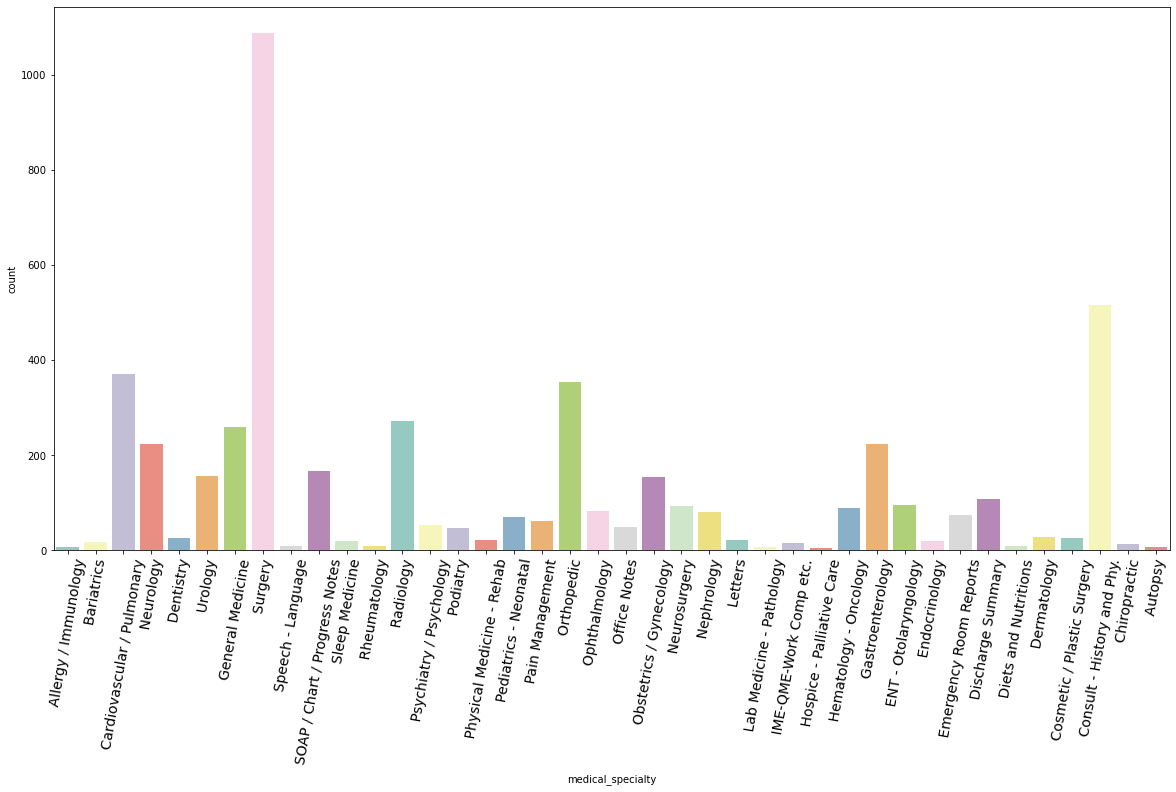

In [9]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=80,fontsize=14)
sns.countplot(x='medical_specialty', data=df,palette="Set3")


In [11]:
df.sample_name.nunique()

2360

In [12]:
df=df[df.medical_specialty.apply(lambda x : str(x).strip()).isin(['Cardiovascular / Pulmonary','Orthopedic'])]

In [13]:
df.shape

(726, 6)

In [14]:
df.medical_specialty.value_counts()

 Cardiovascular / Pulmonary    371
 Orthopedic                    355
Name: medical_specialty, dtype: int64

In [15]:
df.iloc[0]['transcription']

'2-D M-MODE: , ,1.  Left atrial enlargement with left atrial diameter of 4.7 cm.,2.  Normal size right and left ventricle.,3.  Normal LV systolic function with left ventricular ejection fraction of 51%.,4.  Normal LV diastolic function.,5.  No pericardial effusion.,6.  Normal morphology of aortic valve, mitral valve, tricuspid valve, and pulmonary valve.,7.  PA systolic pressure is 36 mmHg.,DOPPLER: , ,1.  Mild mitral and tricuspid regurgitation.,2.  Trace aortic and pulmonary regurgitation.'

In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
nlp=spacy.load('en_core_web_lg')

def lemmatize(text):
    words_in_para =[]
    lemmatizer = WordNetLemmatizer()
    doc=nlp(text)
    for token in doc:
        words_in_para.append(token.lemma_)
    return ' '.join(words_in_para) 

def stemmize(text):
    words_in_para =[]
    stemmer = PorterStemmer()
    doc=nlp(text)
    for token in doc:
        words_in_para.append(stemmer.stem(token.text))
    return ' '.join(words_in_para) 

# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
import string
import re

def text_cleaning(text): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub(' ', text2)
    cleaned_str=str(' '.join([word for word in text2.split() if word not in (stop)]))
    return cleaned_str

def text_clean(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))
    
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    words = text.split()
    i = 0
    while i < len(words):
        if (words[i] in STOPWORDS) or (re.search('[0-9]+',words[i])!=None) or (len(words[i])<3):
            words.pop(i)
        else:
            i += 1
    text = ' '.join(map(str, words))# delete stopwords from text
    return text

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

In [18]:
class Lemmatize(TransformerMixin):
    def __init__(self,col):
            self.col = col
    def fit(self, X, y):
        return self
    
    def lemmatize(text):
        words_in_para =[]
        lemmatizer = WordNetLemmatizer()
        doc=nlp(text)
        for token in doc:
            words_in_para.append(token.lemma_)
        return ' '.join(words_in_para) 
    
    def transform(self, X):
        if type(X)==pd.core.series.Series:
            X=X.apply(lemmatize)
        else:
            for i in self.col:
                X[i]=X[i].apply(lemmatize)

        return X         
           

In [19]:
type(df['transcription'])== pd.core.series.Series

True

In [20]:
class TextClean(TransformerMixin):
    def __init__(self,col):
            self.col = col
    def fit(self, X, y):
        return self
    
    def text_clean(text):
        REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
        BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
        STOPWORDS = set(stopwords.words('english'))

        text = text.lower()
        text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
        text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
        words = text.split()
        i = 0
        while i < len(words):
            if (words[i] in STOPWORDS) or (re.search('[0-9]+',words[i])!=None) or (len(words[i])<3):
                words.pop(i)
            else:
                i += 1
        text = ' '.join(map(str, words))# delete stopwords from text
        return text
    
    def transform(self, X):
        if type(X)==pd.core.series.Series:
            X=X.apply(text_clean)
        else:
            for i in self.col:
                X[i]=X[i].apply(text_clean)
        return X 

In [21]:
df.transcription.iloc[1]

'1.  The left ventricular cavity size and wall thickness appear normal.  The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%.  There is near-cavity obliteration seen.  There also appears to be increased left ventricular outflow tract gradient at the mid cavity level consistent with hyperdynamic left ventricular systolic function.  There is abnormal left ventricular relaxation pattern seen as well as elevated left atrial pressures seen by Doppler examination.,2.  The left atrium appears mildly dilated.,3.  The right atrium and right ventricle appear normal.,4.  The aortic root appears normal.,5.  The aortic valve appears calcified with mild aortic valve stenosis, calculated aortic valve area is 1.3 cm square with a maximum instantaneous gradient of 34 and a mean gradient of 19 mm.,6.  There is mitral annular calcification extending to leaflets and supportive structures with thickening of mitral valve leaflets with mi

In [22]:
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."
...,...,...,...,...,...,...
4972,4972,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,Adenosine Nuclear Scan,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","cardiovascular / pulmonary, adenosine nuclear ..."
4973,4973,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary,Acute Inferior Myocardial Infarction,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",NaN
4974,4974,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,Angina - Consult,"HISTORY OF PRESENT ILLNESS: , The patient is a...",NaN
4975,4975,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary,Abnormal Stress Test,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...","cardiovascular / pulmonary, standard bruce, ni..."


In [23]:
df.shape

(726, 6)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.model_selection import train_test_split

X = df['transcription']
y = df['medical_specialty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [26]:
text_clf_lr = Pipeline([('ct', TextClean(['transcription'])),
                        ('Lemma', Lemmatize(['transcription'])),
                        ('tfidf', TfidfVectorizer(max_df=.9,lowercase=True,ngram_range=(1,3), analyzer='word', stop_words='english',max_features=1000)),
                        ('clf', LogisticRegression(solver='lbfgs')),
])

In [27]:
ct=Lemmatize(['transcription'])
ct.fit(X,y)
ct.transform(X)

3       2 - d M - MODE : , , 1 .   left atrial enlarge...
4       1 .   the left ventricular cavity size and wal...
7       2 - d echocardiogram , multiple view of the he...
9       DESCRIPTION:,1 .   normal cardiac chamber size...
11      2 - d study,1 . mild aortic stenosis , widely ...
                              ...                        
4972    indication : , chest pain . ,TYPE of TEST : , ...
4973    CHIEF COMPLAINT : , chest pain . ,HISTORY of p...
4974    history of present illness : , the patient be ...
4975    history of present illness : , Mr. ABC be a 60...
4976    reason for consultation :   , abnormal echocar...
Name: transcription, Length: 726, dtype: object

In [28]:
ct=TextClean(['transcription'])
ct.fit(X,y)
ct.transform(X)

3       mmode left atrial enlargement left atrial diam...
4       left ventricular cavity size wall thickness ap...
7       echocardiogram multiple views heart great vess...
9       description normal cardiac chambers size norma...
11      study mild aortic stenosis widely calcified mi...
                              ...                        
4972    indication chest pain type test adenosine nucl...
4973    chief complaint chest pain history present ill...
4974    history present illness patient woman followin...
4975    history present illness abc gentleman markedly...
4976    reason consultation abnormal echocardiogram fi...
Name: transcription, Length: 726, dtype: object

In [29]:
#Training the model
text_clf_lr.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lr.predict(X_test)


from sklearn import metrics
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

0.9954128440366973
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       1.00      0.99      0.99        99
                 Orthopedic       0.99      1.00      1.00       119

                   accuracy                           1.00       218
                  macro avg       1.00      0.99      1.00       218
               weighted avg       1.00      1.00      1.00       218

[[ 98   1]
 [  0 119]]


In [30]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(text_clf_lr, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9954128440366973


In [31]:
loaded_model.predict(pd.DataFrame({'transcription':['ramesh orthopedic']}))

array([' Cardiovascular / Pulmonary'], dtype=object)

In [35]:
probability=text_clf_lr.predict_proba(X_test)
probability

array([[0.85548859, 0.14451141],
       [0.37829886, 0.62170114],
       [0.88651751, 0.11348249],
       [0.89542355, 0.10457645],
       [0.78083274, 0.21916726],
       [0.92832091, 0.07167909],
       [0.79922372, 0.20077628],
       [0.13027393, 0.86972607],
       [0.4143709 , 0.5856291 ],
       [0.8987339 , 0.1012661 ],
       [0.55481166, 0.44518834],
       [0.79950134, 0.20049866],
       [0.90877278, 0.09122722],
       [0.81000583, 0.18999417],
       [0.21788137, 0.78211863],
       [0.24807238, 0.75192762],
       [0.90445518, 0.09554482],
       [0.19235025, 0.80764975],
       [0.13208011, 0.86791989],
       [0.42097408, 0.57902592],
       [0.75153446, 0.24846554],
       [0.17972105, 0.82027895],
       [0.89605362, 0.10394638],
       [0.86794215, 0.13205785],
       [0.21457361, 0.78542639],
       [0.92284131, 0.07715869],
       [0.43926569, 0.56073431],
       [0.10862649, 0.89137351],
       [0.857811  , 0.142189  ],
       [0.23229566, 0.76770434],
       [0.

In [36]:
predict_summary=pd.DataFrame({'transcription':X_test,'prediction':predictions,'actual_label' : y_test,'probability':list(probability)})
wrong_predict=predict_summary[predict_summary.prediction!=predict_summary.actual_label]
wrong_predict.head(27)

,transcription,prediction,actual_label,probability
2195,reason evaluation,Radiology,Orthopedic,"[0.3782988562830899, 0.6217011437169101]"
1540,exam right foot series reason exam injury find...,Orthopedic,Radiology,"[0.554811656706671, 0.44518834329332896]"
2037,exam three view right foot reason exam right f...,Radiology,Orthopedic,"[0.37086750287135817, 0.6291324971286418]"
1617,preoperative diagnosis low back pain postopera...,Orthopedic,Radiology,"[0.6987258976405326, 0.3012741023594674]"
2261,head without contrast cervical spine without c...,Radiology,Orthopedic,"[0.34013538085577066, 0.6598646191442293]"
1571,exam mri leave knee without contrast clinical ...,Orthopedic,Radiology,"[0.6271305157584042, 0.37286948424159577]"
2268,exam cervical spine cspine trauma finding exam...,Radiology,Orthopedic,"[0.4984599167401187, 0.5015400832598813]"
2128,progressive low extremity weakness rhf present...,Radiology,Orthopedic,"[0.35981539601966706, 0.640184603980333]"
1620,preoperative diagnosis ovarian cyst persistent...,Orthopedic,Radiology,"[0.768765411720733, 0.23123458827926704]"
2112,bilateral low extremity numbness rhm complain ...,Radiology,Orthopedic,"[0.4283146114592681, 0.5716853885407319]"


In [38]:
wrong_predict.transcription[1560]

'exam mri leave shoulder clinical male pain shoulder evaluate rotator cuff tear finding examination perform marked supraspinatus tendinosis extensive tear substance tendon articular surface extend myotendinous junction well still small rim tendon along bursal surface although may small tear level rotator interval retract tendon muscular atrophy series image normal infraspinatus tendon subscapularis tendinosis fray partial tear superior fiber extend level rotator interval series image series image complete tear gap fiber retraction muscular atrophy tendinosis superficial tearing long bicep tendon within bicipital groove high grade near complete partial tearing intracapsular portion tendon bicep anchor intact degenerative change great tuberosity humerus fracture subluxation degeneration superior labrum small nondisplaced tear posterior superior labrum one two oclock position series image series image series image small sublabral foramen eleven oclock position series image osseous bankart

In [39]:
lr_probs=probability[:,1]

In [40]:
r_auc = metrics.roc_auc_score(y_test, lr_probs)

In [41]:
r_auc

0.9458733424782807

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_probs,pos_label=text_clf_lr.classes_[1])

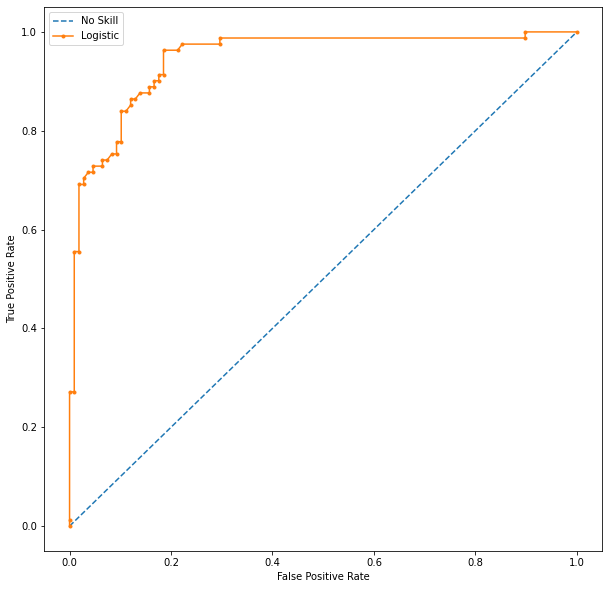

In [43]:
plt.figure(figsize=(10,10))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

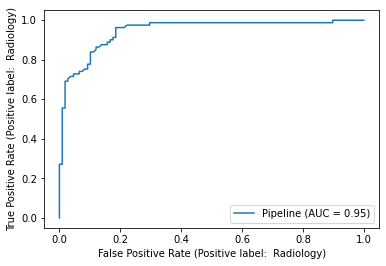

In [44]:
metrics.plot_roc_curve(text_clf_lr, X_test, y_test)

In [45]:
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print(f'Best Threshold={thresholds[ix]}, G-Mean={gmeans[ix]}')

Best Threshold=0.37286948424159577, G-Mean=0.8857970920815851


In [46]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, lr_probs,pos_label=text_clf_lr.classes_[1])

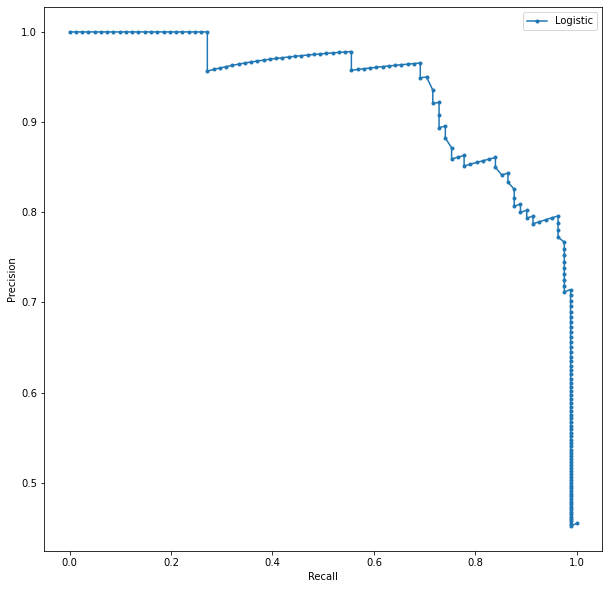

In [47]:
plt.figure(figsize=(10,10))
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [48]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]}, Recall={recall[ix]},Precission={precision[ix]}')

Best Threshold=0.37286948424159577, F-Score=0.871508379888268, Recall=0.9629629629629629,Precission=0.7959183673469388


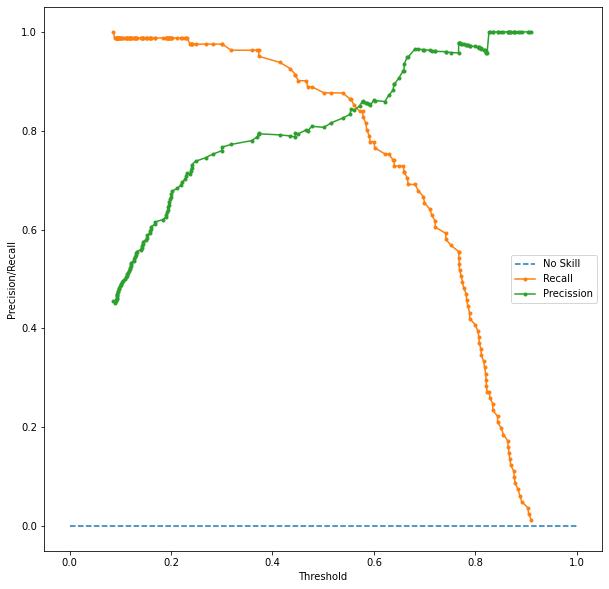

In [49]:
plt.figure(figsize=(10,10))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot( thresholds,recall[0:len(recall)-1], marker='.', label='Recall')
plt.plot( thresholds,precision[0:len(precision)-1], marker='.', label='Precission')
# axis labels
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
# show the plot
plt.show()

In [50]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(max_df=.9,min_df=2,lowercase=True,ngram_range=(1,4), analyzer='word', stop_words='english', max_features=1000)),
                     ('clf', MultinomialNB()),
])

#Training the model
text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

0.8571428571428571
              precision    recall  f1-score   support

  Orthopedic       0.92      0.82      0.87       108
   Radiology       0.79      0.90      0.84        81

    accuracy                           0.86       189
   macro avg       0.86      0.86      0.86       189
weighted avg       0.86      0.86      0.86       189



In [ ]:

df['clean_desc'] = df.description.apply(text_cleaning).apply(lemmatize)

In [ ]:
df.clean_desc

In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

X = df.clean_desc
y = df.medical_specialty

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [ ]:
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer(max_df=.9,min_df=2,lowercase=True,ngram_range=(1,4), analyzer='word', stop_words='english', max_features=1000)),
                     ('clf', LogisticRegression(solver='lbfgs')),
])

In [ ]:
#Training the model
text_clf_lr.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lr.predict(X_test,)

# Report the confusion matrix
from sklearn import metrics
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

In [ ]:
from sklearn.model_selection import train_test_split
X = df.cleaned_transcription
y = df.medical_specialty.apply(lambda x: 1 if x==' Radiology' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=123)

In [ ]:
top_words = 10000 #Vocablury size
t = tf.keras.preprocessing.text.Tokenizer(num_words=top_words) # num_words -> Vocablury size

#Fit tokenizer with actual training data
t.fit_on_texts(X_train)

#Vocabulary
t.word_index


In [ ]:
X_train = t.texts_to_sequences(X_train)
X_train

In [ ]:

X_test = t.texts_to_sequences(X_test)
X_test

In [ ]:

#Define maximum number of words to consider in each review
max_review_length = 500

#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                       maxlen=max_review_length, 
                                                       padding='pre')


In [ ]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(top_words + 1, #Vocablury size
                                    50, #Embedding size
                                    input_length=max_review_length) #Number of words in each review
          )

model.output
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GRU(256,dropout=0.5)) #RNN State - size of cell state and hidden state

model.output

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),tf.keras.metrics.AUC()])

model.summary()


In [ ]:
epochs=40
history=model.fit(X_train,y_train,
          epochs=epochs,
          batch_size=100,  
          validation_data=(X_test, y_test))

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

val_precission = history.history['val_precision']
val_recall = history.history['val_recall']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_precission, label='validation precission')
plt.plot(epochs_range, val_recall, label='Validation recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
